# Imports

In [1]:
# data
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import seaborn as sns
# model
from sklearn.ensemble import RandomForestClassifier
# evaluation
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix

# Load Data

In [2]:
dataset = load_breast_cancer(as_frame=True)

In [3]:
X, y = dataset['data'], dataset['target']

In [4]:
X.shape, y.shape

((569, 30), (569,))

In [5]:
def train_validate_test_split(X, y, *args, **kwargs):  
    X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, *args, **kwargs)    
    X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, *args, **kwargs)
    return X_train, X_val, X_test, y_train, y_val, y_test

In [6]:
X_train, X_val, X_test, y_train, y_val, y_test = train_validate_test_split(X, y, random_state=42)

In [7]:
print([item.shape for item in (X_train, X_val, X_test, y_train, y_val, y_test)])

[(319, 30), (107, 30), (143, 30), (319,), (107,), (143,)]


# Preview

In [8]:
print(dataset['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [9]:
X_train.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
61,8.598,20.98,54.66,221.8,0.12430,0.08963,0.03000,0.009259,0.1828,0.06757,...,9.565,27.04,62.06,273.9,0.1639,0.1698,0.09001,0.02778,0.2972,0.07712
446,17.750,28.03,117.30,981.6,0.09997,0.13140,0.16980,0.082930,0.1713,0.05916,...,21.530,38.54,145.40,1437.0,0.1401,0.3762,0.63990,0.19700,0.2972,0.09075
341,9.606,16.84,61.64,280.5,0.08481,0.09228,0.08422,0.022920,0.2036,0.07125,...,10.750,23.07,71.25,353.6,0.1233,0.3416,0.43410,0.08120,0.2982,0.09825
135,12.770,22.47,81.72,506.3,0.09055,0.05761,0.04711,0.027040,0.1585,0.06065,...,14.490,33.37,92.04,653.6,0.1419,0.1523,0.21770,0.09331,0.2829,0.08067
374,13.690,16.07,87.84,579.1,0.08302,0.06374,0.02556,0.020310,0.1872,0.05669,...,14.840,20.21,99.16,670.6,0.1105,0.2096,0.13460,0.06987,0.3323,0.07701


In [10]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int32

Analysis the missing values and unique values

In [11]:
#sns.pairplot(X_train.iloc[:5].join(y_train.iloc[:5].apply(lambda x: dataset['target_names'][x])), hue='target')

In [12]:
def show_missing_info(data):
    data = pd.DataFrame(data)
    return pd.DataFrame({
        'isnull': data.isnull().sum(),
        'nunique': data.nunique(),
        'dtypes': data.dtypes,
    })

In [13]:
show_missing_info(X_train)

,isnull,nunique,dtypes
mean radius,0,282,float64
mean texture,0,284,float64
mean perimeter,0,305,float64
mean area,0,308,float64
mean smoothness,0,287,float64
mean compactness,0,308,float64
mean concavity,0,311,float64
mean concave points,0,309,float64
mean symmetry,0,268,float64
mean fractal dimension,0,292,float64


# Model

In [14]:
model = RandomForestClassifier(n_estimators=100)

In [15]:
model.fit(X_train, y_train)

RandomForestClassifier()

In [16]:
y_val_pred = model.predict(X_val)
val_acc = accuracy_score(y_val, y_val_pred)

In [17]:
print(f'Validation Accuracy: {val_acc:.2%}')

Validation Accuracy: 98.13%


# Evaluation 

In [18]:
y_test_pred = model.predict(X_test)
test_acc = accuracy_score(y_test, y_test_pred)

In [19]:
print(f'Test Accuracy: {test_acc:.2%}')

Test Accuracy: 96.50%


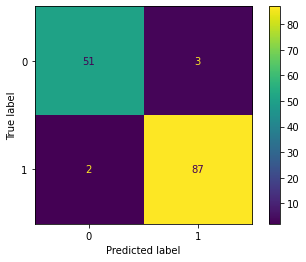

In [20]:
plot_confusion_matrix(model, X_test, y_test)

# Application

In [21]:
def application(idx=None):
    if idx is None:
        idx = np.random.randint(len(X_test))
    print('Collected new features as follows:')
    print(X_test.iloc[idx])
    names = dataset['target_names']
    forecasted = model.predict(X_test.iloc[idx:idx+1])[0]
    actual = y_test.iloc[idx]
    print(f'\n{"CORRECT" if forecasted==actual else "WRONG"}')
    print(f'\nModel forecasted as {forecasted} ({names[forecasted]})')
    print(f'\nActual data should be {actual} ({names[actual]})')

In [22]:
application()

Collected new features as follows:
mean radius                 12.980000
mean texture                19.350000
mean perimeter              84.520000
mean area                  514.000000
mean smoothness              0.095790
mean compactness             0.112500
mean concavity               0.071070
mean concave points          0.029500
mean symmetry                0.176100
mean fractal dimension       0.065400
radius error                 0.268400
texture error                0.566400
perimeter error              2.465000
area error                  20.650000
smoothness error             0.005727
compactness error            0.032550
concavity error              0.043930
concave points error         0.009811
symmetry error               0.027510
fractal dimension error      0.004572
worst radius                14.420000
worst texture               21.950000
worst perimeter             99.210000
worst area                 634.300000
worst smoothness             0.128800
worst compactne